<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/SQL%20for%20mental%20health%20data%20analysis/Queries%20for%20analysis/Deeper_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### More analysis of survey questions

En la sección anterior se vieron las propiedades generales de los datos de las encuestas realizadas a personas de la industria Tech. Ahora se estudiarán las principales características de estas personas y algunas de sus respuestas a las preguntas hechas y obtener conclusiones generales. Uno de los datos personales de los encuestados de los que se dispone es su género, es por esto que se realiza una consulta para conocer esta información de las personas

In [ ]:
query="""
SELECT
  AnswerText AS Gender,
  COUNT(UserID) AS Num_people
FROM
  Answer
WHERE
  QuestionID == 2
GROUP BY
  AnswerText
ORDER BY
  Num_people DESC
"""
gender = pd.read_sql(query, con=connection)
display(gender)

,Gender,Num_people
0,Male,2830
1,Female,914
2,male,212
3,female,110
4,-1,24
...,...,...
96,something kinda male?,1
97,sometimes,1
98,trans woman,1
99,transgender,1


Lo anterior deja ver una lista larga de posibles respuestas para los encuestados, alrededor de 100 respuestas diferentes. Además, existen opciones repetidas pero escritas de manera diferente, por ejemplo los géneros masculino y femenino cuya inicial es mayúscula o minúscula. A continuación se ven gráficamente los 10 géneros más comunes entre los encuestados

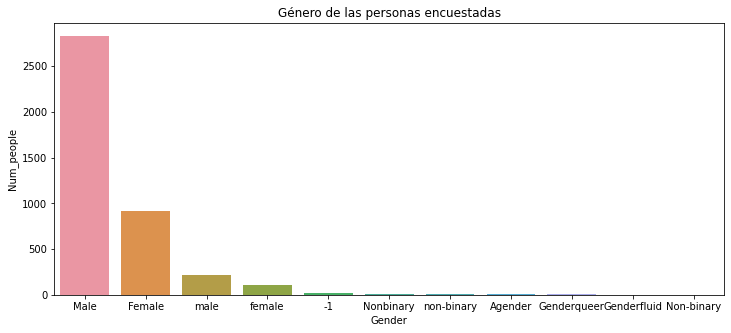

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=gender.Gender.loc[:10], y = gender.Num_people.loc[:10]);
plt.title('Género de las personas encuestadas');

Pasando a otro de los datos personales de la comunidad en cuestión está la edad, para la cual se realiza otra consulta bastante similar a la anterior

In [ ]:
query="""
SELECT
  AnswerText AS Age,
  COUNT(UserID) AS Num_people
FROM
  Answer
WHERE
  QuestionID == 1
GROUP BY
  AnswerText
ORDER BY
  Num_people DESC
"""

ages = pd.read_sql(query, con=connection)
display(ages.head(10))

,Age,Num_people
0,30,250
1,29,229
2,32,227
3,31,223
4,28,220
5,34,202
6,33,201
7,35,201
8,27,197
9,26,194


Estos resultados ordenados de mayor a menor en frecuencia de aparición muestran que el grupo de edad trabajando en esta industria ronda los 30 años. Para ver de mejor manera la distribución de estas edades se muestra el siguiente gráfico de barras

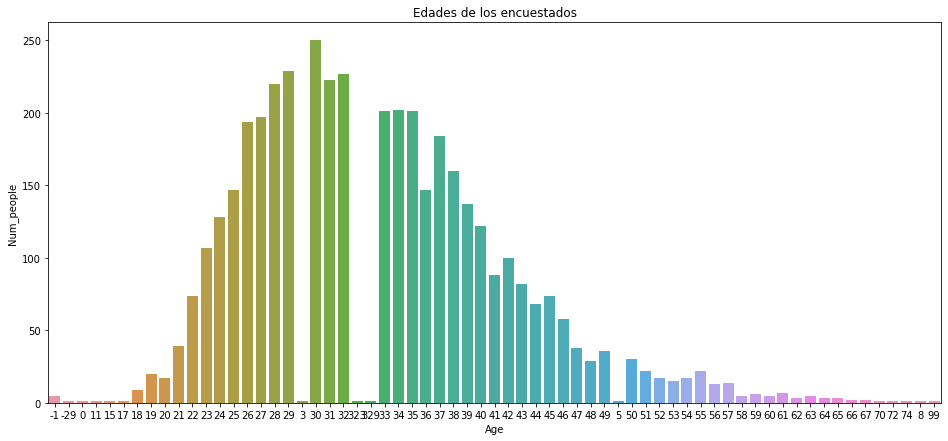

In [ ]:
query="""
SELECT
  AnswerText AS Age,
  COUNT(UserID) AS Num_people
FROM
  Answer
WHERE
  QuestionID == 1
GROUP BY
  AnswerText
"""
ages = pd.read_sql(query, con=connection)

plt.figure(figsize=(16,7))
sns.barplot(x=ages.Age, y = ages.Num_people);
plt.title('Edades de los encuestados');

Esto confirma lo ya mencionado, la mayor cantidad de personas se concentra alrededor de los 30 años con una desviación aproximada de 5 a 10 años. Además, se ven algunos valores mal diligenciados o procesados a la base de datos, como lo son edades negativas. Para aprecir este hecho, mostramos ahora las edades máxima y mínima, así como las medias y medianas de esta característica. Luego se presentan estos mismos valores pero considerando válidas edades entre los 16 y 80 años

In [ ]:
print("Antes del filtrado")
print(f"Edad mínima: ", ages["Age"].astype("int").min())
print(f"Edad máxima: ", ages["Age"].astype("int").max())
print(f"Edad media: ", round(ages["Age"].astype("int").mean(), 2))
print(f"Mediana de las edades: ", ages["Age"].astype("int").median())
print()

x = ages[(ages.Age.astype("int") >= 16) & \
        (ages.Age.astype("int") <= 80)]
print("Después del Filtrado")
print(f"Edad mínima: ", x["Age"].astype("int").min())
print(f"Edad máxima: ", x["Age"].astype("int").max())
print(f"Edad media: ", round(x["Age"].astype("int").mean(), 2))
print(f"Mediana de las edades: ", x["Age"].astype("int").median())

Antes del filtrado
Edad mínima:  -29
Edad máxima:  329
Edad media:  48.02
Mediana de las edades:  41.0

Después del Filtrado
Edad mínima:  17
Edad máxima:  74
Edad media:  43.67
Mediana de las edades:  43.5


Al hacer las consideraciones anteriores se presenta una disminución en la media de la edad de los encuestados, luego estos outliers pueden llevar a conclusiones erradas.

El país donde residen los encuestados es también otro de los datos que proporcionan las tablas, así que puede realizarse un análisis de esta característica en función del año de la encuesta

In [ ]:
def country_per_year(year):
  query=f"""
  SELECT
    SurveyID AS Year,
    AnswerText AS Country,
    COUNT(UserID) AS Num_people
  FROM
    Answer
  WHERE
    QuestionID == 3 AND Year == {year}
  GROUP BY
    AnswerText
  ORDER BY
    Num_people DESC
  """
  return query

Ya con la función definida, se aplica para cada año de las encuestas y mostramos los resultados para algunos de estos años

In [ ]:
countries_2014 = pd.read_sql(country_per_year(2014), con=connection)
countries_2016 = pd.read_sql(country_per_year(2016), con=connection)
countries_2017 = pd.read_sql(country_per_year(2017), con=connection)
countries_2018 = pd.read_sql(country_per_year(2018), con=connection)
countries_2019 = pd.read_sql(country_per_year(2019), con=connection)

display(countries_2014.head(10))

,Year,Country,Num_people
0,2014,United States,751
1,2014,United Kingdom,185
2,2014,Canada,72
3,2014,Germany,45
4,2014,Ireland,27
5,2014,Netherlands,27
6,2014,Australia,22
7,2014,France,13
8,2014,India,10
9,2014,New Zealand,8


In [ ]:
display(countries_2017.head(10))

,Year,Country,Num_people
0,2017,United States of America,497
1,2017,United Kingdom,66
2,2017,Canada,26
3,2017,Germany,22
4,2017,France,17
5,2017,Spain,15
6,2017,Netherlands,14
7,2017,India,13
8,2017,Australia,12
9,2017,Switzerland,6


El hecho más importante de estos dataframes mostrados es la clara predominancia de los Estados Unidos como el país de residencia de la mayor parte de los resultados. Para ver lo anterior, adelante se muestran los países que más aparecen en cada año gráficamente

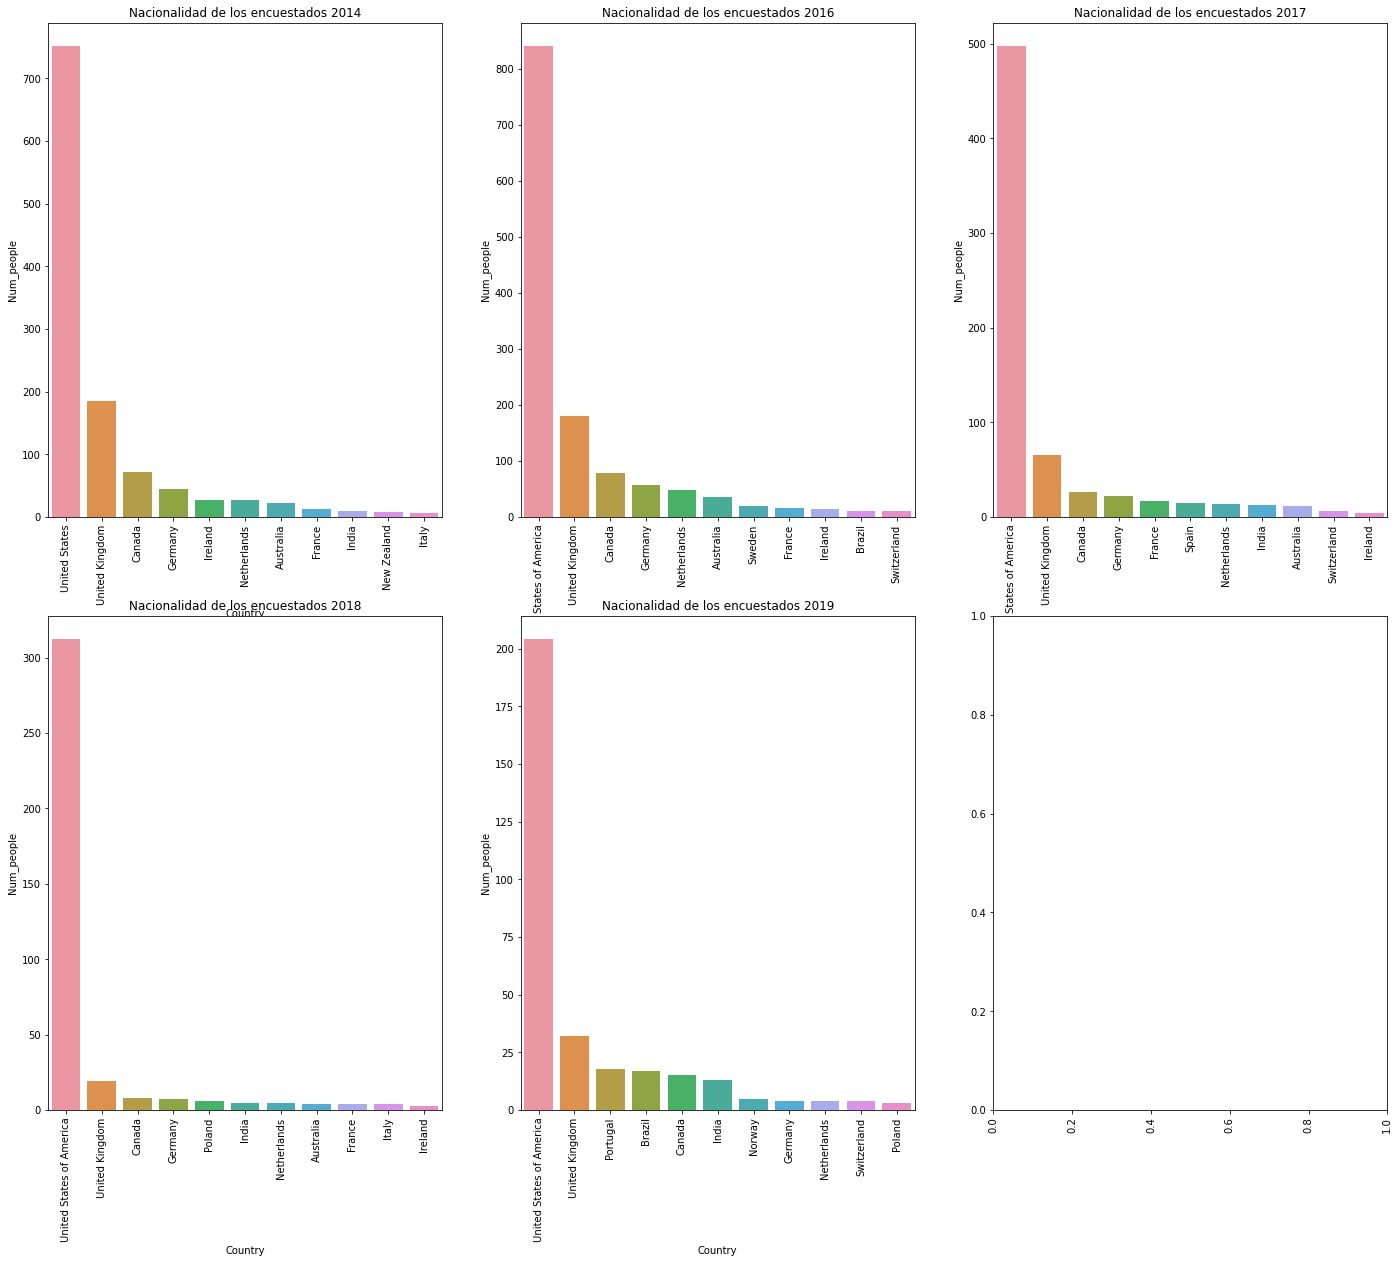

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(24,20))
sns.barplot(x=countries_2014['Country'].loc[:10], y = countries_2014['Num_people'].loc[:10], ax = ax[0][0]);
sns.barplot(x=countries_2016['Country'].loc[:10], y = countries_2016['Num_people'].loc[:10], ax = ax[0][1]);
sns.barplot(x=countries_2017['Country'].loc[:10], y = countries_2017['Num_people'].loc[:10], ax = ax[0][2]);
sns.barplot(x=countries_2018['Country'].loc[:10], y = countries_2018['Num_people'].loc[:10], ax = ax[1][0]);
sns.barplot(x=countries_2019['Country'].loc[:10], y = countries_2019['Num_people'].loc[:10], ax = ax[1][1]);
ax[0][0].title.set_text('Nacionalidad de los encuestados 2014');
ax[0][1].title.set_text('Nacionalidad de los encuestados 2016');
ax[0][2].title.set_text('Nacionalidad de los encuestados 2017');
ax[1][0].title.set_text('Nacionalidad de los encuestados 2018');
ax[1][1].title.set_text('Nacionalidad de los encuestados 2019');
for i in range(2):
  for j in range(3):
    ax[i][j].tick_params(axis='x', labelrotation = 90);

Esto permite ver que Estados Unidos, el Reino Unido y Canadá son los países a los que más representa los resultados de esta encuesta, especialmente el primero de estos. Además, podría estar indicando que dicho país que cuenta con un gran potencial en esta industria.

Así mismo, los resultados pueden visualizarse en un diagrama circular para dar otra perspectiva. En este caso se hará dicho diagrama para los datos de todos los años en conjunto

In [ ]:
query="""
SELECT
  SurveyID AS Year,
  AnswerText AS Country,
  COUNT(UserID) AS Num_people
FROM
  Answer
WHERE
  QuestionID == 3
GROUP BY
  AnswerText
ORDER BY
  Num_people DESC
"""

countries = pd.read_sql(query, con=connection)
display(countries.head(10))

,Year,Country,Num_people
0,2019,United States of America,1853
1,2014,United States,751
2,2019,United Kingdom,482
3,2019,Canada,199
4,2019,Germany,136
5,2019,Netherlands,98
6,2018,Australia,73
7,2019,France,51
8,2019,Ireland,51
9,2019,India,50


In [ ]:
fig = px.pie(countries.head(7), values='Num_people', names='Country', title='Países origen de personas que tomaron la encuesta')
fig.show()

Únicamente países de norteamérica y Europa se aprecian en el top 7 de estas encuestas, a excepción de Australia entrando en el último lugar de este grupo.

Por otro lado, es importante analizar los resultados de las preguntas relacionadas con la salud mental de los encuestados. Por ejemplo, una de las preguntas estipula si el individuo ha buscado ayuda profesional en algún momento de su vida en temas de salud mental. Estos resultados son importantes, ya que si la respuesta es positiva podría indicar que dicho individuo puede requerir de nuevo ayuda actualmente, o en un futuro.

Es por esto que se define una función que extraiga dichos resultados según el año de la encuesta

In [ ]:
def help(year):
  query=f"""
  SELECT
    SurveyID AS Year,
    AnswerText,
    COUNT(UserID) AS Num_people
  FROM
    Answer
  WHERE
    QuestionID == 6 AND SurveyID == {year}
  GROUP BY
    AnswerText
  ORDER BY
    Num_people DESC
  """
  return query

help_2014 = pd.read_sql(help(2014), con=connection)
help_2016 = pd.read_sql(help(2016), con=connection)
help_2017 = pd.read_sql(help(2017), con=connection)
help_2018 = pd.read_sql(help(2018), con=connection)
help_2019 = pd.read_sql(help(2019), con=connection)
display(help_2016)

,Year,AnswerText,Num_people
0,2016,Yes,670
1,2016,No,488
2,2016,I don't know,275


La función se aplicó para cada una de las encuestas de la base de datos y los resultados para el 2016 deja ver que existían 3 posibles respuestas. Ahora, se realizará una visualización de dichos resultados, de tal manera que se observe la evolución de estos resultados en el tiempo

In [ ]:
years = [2014,2016,2017,2018,2019]
lista = []

lista.append(list(help_2014['Num_people']*100/help_2014['Num_people'].sum()))
lista.append(list(help_2016['Num_people']*100/help_2016['Num_people'].sum()))
lista.append(list(help_2017['Num_people']*100/help_2017['Num_people'].sum()))
lista.append(list(help_2018['Num_people']*100/help_2018['Num_people'].sum()))
lista.append(list(help_2019['Num_people']*100/help_2019['Num_people'].sum()))

aux = list(map(list, zip(*lista)))

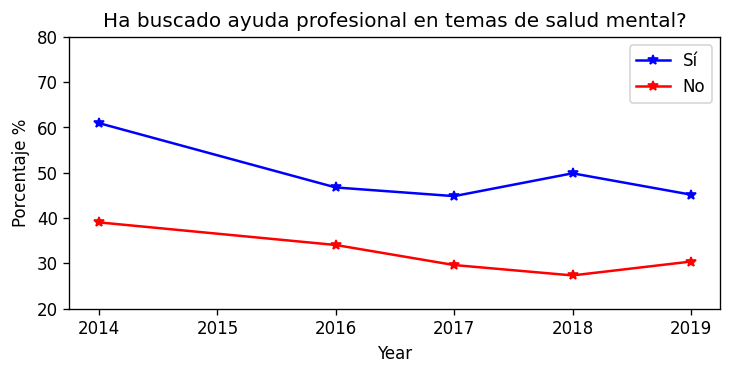

In [ ]:
fig, ax = plt.subplots(1, figsize=(7,3), dpi=120)
ax.plot(years, aux[0], 'b*-', label = 'Sí')
ax.plot(years, aux[1], 'r*-', label = 'No')
ax.set(title='Ha buscado ayuda profesional en temas de salud mental?', xlabel='Year', ylabel='Porcentaje %', ylim=(20,80))
plt.legend()
plt.show()

Como se dijo anteriormente, estos resultados pueden resultar de gran importancia, ya que a lo largo de los años predominan las personas que han buscado ayuda profesional en este tema sobre las que no lo han hecho. Esto puede dar pistas a las empresas y empleadores para hacer acompañamiento a sus trabajadores y brindarles ayuda oportuna.

A propósito de la ayuda que se le brinda a estas personas, puede analizarse una pregunta que trata exactamente de esto: su empleador le provee de beneficios relacionados con salud mental?

Con el fin de realizar un estudio similar a la pregunta anteriormente estudiada, se define la siguiente función

In [ ]:
def employer(year):
  query=f"""
  SELECT
    SurveyID AS Year,
    AnswerText,
    COUNT(UserID) AS Num_people
  FROM
    Answer
  WHERE
    QuestionID == 10 AND SurveyID == {year}
  GROUP BY
    AnswerText
  ORDER BY
    Num_people DESC
  """
  return query

employer_2014 = pd.read_sql(employer(2014), con=connection)
employer_2016 = pd.read_sql(employer(2016), con=connection)
employer_2017 = pd.read_sql(employer(2017), con=connection)
employer_2018 = pd.read_sql(employer(2018), con=connection)
employer_2019 = pd.read_sql(employer(2019), con=connection)
display(employer_2019)

,Year,AnswerText,Num_people
0,2019,Yes,164
1,2019,I don't know,87
2,2019,-1,48
3,2019,No,35
4,2019,Not eligible for coverage / NA,18


De igual manera, la función se evaluó para cada año de las encuestas dispuesta. En este caso se tienen 5 respuestas diferentes, una de ellas '-1', la cual también apareció al estudiar características como el género y la edad de las personas y que se asume como un error a la hora de guardar los datos en las tablas correspondientes, ya que no se dispone de información adicional sobre su significado.

Caso similar a lo hecho con la anterior pregunta analizada, se grafica el comportamiento de los resultados obtenidos en función del tiempo como se muestra a continuación

In [ ]:
lista = []

lista.append(list(employer_2014['Num_people']*100/employer_2014['Num_people'].sum()))
lista.append(list(employer_2016['Num_people']*100/employer_2016['Num_people'].sum()))
lista.append(list(employer_2017['Num_people']*100/employer_2017['Num_people'].sum()))
lista.append(list(employer_2018['Num_people']*100/employer_2018['Num_people'].sum()))
lista.append(list(employer_2019['Num_people']*100/employer_2019['Num_people'].sum()))
lista[0].append(0)
lista[0].append(0)

aux = list(map(list, zip(*lista)))

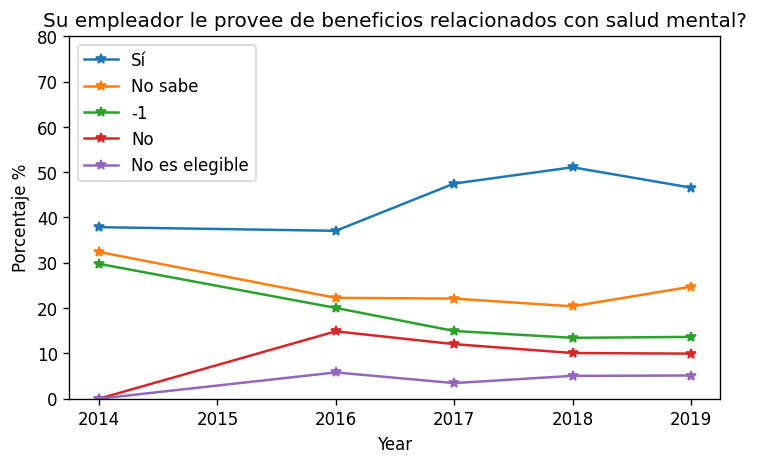

In [ ]:
fig, ax = plt.subplots(1, figsize=(7,4), dpi=120)
ax.plot(years, aux[0], '*-', label = 'Sí')
ax.plot(years, aux[1], '*-', label = 'No sabe')
ax.plot(years, aux[2], '*-', label = '-1')
ax.plot(years, aux[3], '*-', label = 'No')
ax.plot(years, aux[4], '*-', label = 'No es elegible')
ax.set(title='Su empleador le provee de beneficios relacionados con salud mental?', xlabel='Year', ylabel='Porcentaje %', ylim=(0,80))
plt.legend()
plt.show()

Estos resultados permiten ver que un buen porcentaje de los trabajadores pueden acceder a servicios relacionados con salud mental, lo cual es un aspecto positivo en el control de este tema. Sin embargo, alrededor de una tercer o cuarta parte de los encuestados afirman no tener conocimiento al respecto, que representan un sector significativo de los encuestados y debería mejorarse con una mejor divulgación de estos servicios, de existir. Así mismo, existe un porcentaje cercano al 30% que dice no tener estos beneficios o no ser elegibles para los mismos, lo cual puede mejorarse con el paso de los años por parte de los empleadores de esta industria.